## Importing the required Libraries

In [1]:
# Import
# ======

# essential libraries
import math
import random
import datetime
from datetime import timedelta

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import calmap
import folium
import datetime as dt
from datetime import date
import requests
import sys
from itertools import chain
import pycountry
import pycountry_convert as pc

import plotly.io as pio
pio.templates.default = "plotly_dark"
%matplotlib inline

# color pallette
cnf, dth, rec, act, grn = '#393e46', '#ff2e63', '#21bf73', '#fe9801','#2ca02c' 
blu,bro = '#1f77b4','#8c564b'
# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Algorithms
# 1. Linear Regeression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Importing the Data

### Data set
#### clean_data
##### Province,Lat,Long,Date,Confirmed,Deaths,Recovered

In [2]:
clean_data=pd.read_csv('covid_19_clean_complete.csv')

### Cleaning Data - Data Processing

In [3]:
display(clean_data.shape)
display(clean_data.info())
display(clean_data.head())
display(clean_data.describe())

(24366, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 8 columns):
Province/State    7440 non-null object
Country/Region    24366 non-null object
Lat               24366 non-null float64
Long              24366 non-null float64
Date              24366 non-null object
Confirmed         24366 non-null int64
Deaths            24366 non-null int64
Recovered         24366 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ MB


None

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


,Lat,Long,Confirmed,Deaths,Recovered
count,24366.000000,24366.000000,24366.000000,24366.000000,24366.000000
mean,21.433571,22.597991,2152.827834,127.834565,528.564844
std,24.740928,70.570944,20988.481790,1372.389014,4679.309813
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,5.000000,0.000000,0.000000
75%,41.204400,81.000000,165.000000,2.000000,13.000000
max,71.706900,178.065000,869170.000000,49954.000000,103300.000000


In [4]:
clean_data.rename(columns={'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'lat','Long':'long',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)
# cases 
cases = ['confirmed', 'deaths', 'recovered', 'active']
# Active Case = confirmed - deaths - recovered
clean_data['active'] = clean_data['confirmed'] - clean_data['deaths'] - clean_data['recovered']

In [5]:
clean_data

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24361,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,1,0,0,1
24362,NaN,South Sudan,6.877000,31.307000,4/23/20,5,0,0,5
24363,NaN,Western Sahara,24.215500,-12.885800,4/23/20,6,0,5,1
24364,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,4,0,0,4


#### Date Formatting

In [6]:
clean_data['date'] = pd.to_datetime(clean_data['date'])
today = date.today()
yesterday = today-datetime.timedelta(days=1)
tomorrow = today+datetime.timedelta(days=1)
max_date = clean_data['date'].max()
print("Today's Date is ",today)
print("yesterday's Date is ",yesterday)
print("Tomorrow's Date is ",tomorrow)
print("latest record date",max_date)

Today's Date is  2020-04-27
yesterday's Date is  2020-04-26
Tomorrow's Date is  2020-04-28
latest record date 2020-04-23 00:00:00


#### Checking whether data is updated

In [7]:
# Check if the data is updated
print("External Data")
print(f"Earliest Entry: {clean_data['date'].min()}")
print(f"Last Entry:     {clean_data['date'].max()}")
print(f"Total Days:     {clean_data['date'].max() - clean_data['date'].min()}")

External Data
Earliest Entry: 2020-01-22 00:00:00
Last Entry:     2020-04-23 00:00:00
Total Days:     92 days 00:00:00


#### Cheking for missing values and taking care of them

In [8]:
#Missing Values
clean_data.isnull().sum().to_frame('nulls')

,nulls
state,16926
country,0
lat,0
long,0
date,0
confirmed,0
deaths,0
recovered,0
active,0


In [9]:
clean_data[['state']] = clean_data[['state']].fillna('')
clean_data[cases] = clean_data[cases].fillna(0)

In [10]:
clean_data.isnull().sum().to_frame('nulls')

,nulls
state,0
country,0
lat,0
long,0
date,0
confirmed,0
deaths,0
recovered,0
active,0


#### clean_data - Data Types

In [11]:
clean_data.dtypes

state                object
country              object
lat                 float64
long                float64
date         datetime64[ns]
confirmed             int64
deaths                int64
recovered             int64
active                int64
dtype: object

#### Filtering problemating Data

In [12]:
# Filter out problematic data points (The Diamond Princess, cruise ships were associated with Canada)
removed_state = "Diamond Princess"
removed_country = "Diamond Princess"

clean_data = clean_data[~clean_data["state"].replace(np.nan, "nan").str.match(removed_state)]
clean_data = clean_data[~clean_data["country"].replace(np.nan, "nan").str.match(removed_country)]

In [13]:
# dealing with negative values in active cases (Min in active is -6), this shows that any of the confirmed or deaths or 
# recovered are having negative values 
num1 = clean_data['active']._get_numeric_data()
num1[num1 < 0] = 0

In [14]:
display(clean_data.shape)
display(clean_data.info())
display(clean_data.head())
display(clean_data.describe())

(24180, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24180 entries, 0 to 24365
Data columns (total 9 columns):
state        24180 non-null object
country      24180 non-null object
lat          24180 non-null float64
long         24180 non-null float64
date         24180 non-null datetime64[ns]
confirmed    24180 non-null int64
deaths       24180 non-null int64
recovered    24180 non-null int64
active       24180 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 1.8+ MB


None

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


,lat,long,confirmed,deaths,recovered,active
count,24180.000000,24180.000000,24180.000000,24180.000000,24180.000000,24180.000000
mean,21.598445,22.771822,2167.386022,128.795079,531.659140,1506.934036
std,24.764109,70.813917,21068.376350,1377.613619,4697.095339,17127.879419
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000,0.000000
25%,7.844875,-20.026050,0.000000,0.000000,0.000000,0.000000
50%,23.692500,20.972650,5.000000,0.000000,0.000000,2.000000
75%,41.227200,81.812500,163.000000,2.000000,13.000000,78.000000
max,71.706900,178.065000,869170.000000,49954.000000,103300.000000,739013.000000


clean_data.head()

#### Creating a Master Copy of the Data

##### Data Set Name - data
###### Columns - province,lat,long,date,confirmed,deaths,recovered.active

In [15]:
data = clean_data.copy()

In [16]:
data.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'active'],
      dtype='object')

In [17]:
data['mortality'] = data['deaths'] / data['confirmed']

In [18]:
data.sample(10)

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality
4050,,Germany,51.0000,9.0000,2020-02-06,12,0,0,12,0.000000
13333,,Grenada,12.1165,-61.6790,2020-03-12,0,0,0,0,NaN
751,,Venezuela,6.4238,-66.5897,2020-01-24,0,0,0,0,NaN
14090,,Suriname,3.9193,-56.0278,2020-03-15,1,0,0,1,0.000000
11973,,Poland,51.9194,19.1451,2020-03-07,5,0,0,5,0.000000
13479,,Gabon,-0.8037,11.6094,2020-03-13,0,0,0,0,NaN
5101,,Guatemala,15.7835,-90.2308,2020-02-10,0,0,0,0,NaN
23886,Quebec,Canada,52.9399,-73.5491,2020-04-22,20965,1134,0,19831,0.054090
6273,,Burma,21.9162,95.9560,2020-02-14,0,0,0,0,NaN
22879,,Costa Rica,9.7489,-83.7534,2020-04-18,655,4,97,554,0.006107


In [19]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality
0,,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,NaN
1,,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,NaN
2,,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,NaN
3,,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,NaN
4,,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
24361,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-23,1,0,0,1,0.0
24362,,South Sudan,6.877000,31.307000,2020-04-23,5,0,0,5,0.0
24363,,Western Sahara,24.215500,-12.885800,2020-04-23,6,0,5,1,0.0
24364,,Sao Tome and Principe,0.186360,6.613081,2020-04-23,4,0,0,4,0.0


#### Reading Population Data
****In this Data the Population is 2020 census****

##### Cleaning the Data

In [20]:
def p2f(x):
    """
    Convert urban percentage to float
    """
    try:
        return float(x.strip('%'))/100
    except:
        return np.nan

def age2int(x):
    """
    Convert Age to integer
    """
    try:
        return int(x)
    except:
        return np.nan

def fert2float(x):
    """
    Convert Fertility Rate to float
    """
    try:
        return float(x)
    except:
        return np.nan

## Reding the Population Data and using converters

data_pop = pd.read_csv("population_by_country_2020.csv", 
                           converters={'Urban Pop %':p2f,
                           'Fert. Rate':fert2float,
                           'Med. Age':age2int})

In [21]:
data_pop

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38.0,0.61,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28.0,0.35,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38.0,0.83,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30.0,0.56,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23.0,0.35,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06%,3,50,100,NaN,NaN,NaN,0.10,0.00%
231,Falkland Islands,3480,3.05%,103,0,12170,NaN,NaN,NaN,0.66,0.00%
232,Niue,1626,0.68%,11,6,260,NaN,NaN,NaN,0.46,0.00%
233,Tokelau,1357,1.27%,17,136,10,NaN,NaN,NaN,0.00,0.00%


In [22]:
display(data_pop.shape)
display(data_pop.info())
display(data_pop.head())
display(data_pop.describe())

(235, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
Country (or dependency)    235 non-null object
Population (2020)          235 non-null int64
Yearly Change              235 non-null object
Net Change                 235 non-null int64
Density (P/Km²)            235 non-null int64
Land Area (Km²)            235 non-null int64
Migrants (net)             201 non-null float64
Fert. Rate                 201 non-null float64
Med. Age                   201 non-null float64
Urban Pop %                222 non-null float64
World Share                235 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 20.3+ KB


None

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38.0,0.61,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28.0,0.35,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38.0,0.83,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30.0,0.56,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23.0,0.35,2.83%


,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000
mean,3.316936e+07,3.460878e+05,475.770213,5.535918e+05,6.283582,2.693035,30.606965,0.592342
std,1.351374e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548,1.264496,9.127965,0.242304
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000
25%,3.988760e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,0.430000
50%,5.459642e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000,2.300000,30.000000,0.605000
75%,2.057705e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000,3.600000,39.000000,0.790000
max,1.439324e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,1.000000


In [23]:
data_pop.rename(columns={'Country (or dependency)': 'country',
                             'Population (2020)' : 'population',
                             'Density (P/Km²)' : 'density',
                             'Fert. Rate' : 'fertility',
                             'Med. Age' : "age",
                             'Urban Pop %' : 'urban percentage'}, inplace=True)
data_pop['country'] = data_pop['country'].replace('United States', 'US')
data_pop = data_pop[["country", "population", "density", "fertility", "age", "urban percentage"]]

In [24]:
display(data_pop.shape)
display(data_pop.info())
display(data_pop.head())
display(data_pop.describe())

(235, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
country             235 non-null object
population          235 non-null int64
density             235 non-null int64
fertility           201 non-null float64
age                 201 non-null float64
urban percentage    222 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 11.1+ KB


None

,country,population,density,fertility,age,urban percentage
0,China,1439323776,153,1.7,38.0,0.61
1,India,1380004385,464,2.2,28.0,0.35
2,US,331002651,36,1.8,38.0,0.83
3,Indonesia,273523615,151,2.3,30.0,0.56
4,Pakistan,220892340,287,3.6,23.0,0.35


,population,density,fertility,age,urban percentage
count,2.350000e+02,235.000000,201.000000,201.000000,222.000000
mean,3.316936e+07,475.770213,2.693035,30.606965,0.592342
std,1.351374e+08,2331.285935,1.264496,9.127965,0.242304
min,8.010000e+02,0.000000,1.100000,15.000000,0.000000
25%,3.988760e+05,37.000000,1.700000,22.000000,0.430000
50%,5.459642e+06,95.000000,2.300000,30.000000,0.605000
75%,2.057705e+07,239.500000,3.600000,39.000000,0.790000
max,1.439324e+09,26337.000000,7.000000,48.000000,1.000000


#### Merging the Population Data with the original data

In [25]:
data = pd.merge(data, data_pop, on='country')

In [26]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality,population,density,fertility,age,urban percentage
0,,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25
1,,Afghanistan,33.000000,65.000000,2020-01-23,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25
2,,Afghanistan,33.000000,65.000000,2020-01-24,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25
3,,Afghanistan,33.000000,65.000000,2020-01-25,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25
4,,Afghanistan,33.000000,65.000000,2020-01-26,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23059,,Yemen,15.552727,48.516388,2020-04-19,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38
23060,,Yemen,15.552727,48.516388,2020-04-20,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38
23061,,Yemen,15.552727,48.516388,2020-04-21,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38
23062,,Yemen,15.552727,48.516388,2020-04-22,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38


In [27]:
data['infectionRate'] = round((data['confirmed']/data['population'])*100, 5)

In [28]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality,population,density,fertility,age,urban percentage,infectionRate
0,,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0
1,,Afghanistan,33.000000,65.000000,2020-01-23,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0
2,,Afghanistan,33.000000,65.000000,2020-01-24,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0
3,,Afghanistan,33.000000,65.000000,2020-01-25,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0
4,,Afghanistan,33.000000,65.000000,2020-01-26,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23059,,Yemen,15.552727,48.516388,2020-04-19,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38,0.0
23060,,Yemen,15.552727,48.516388,2020-04-20,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38,0.0
23061,,Yemen,15.552727,48.516388,2020-04-21,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38,0.0
23062,,Yemen,15.552727,48.516388,2020-04-22,1,0,0,1,0.0,29825964,56,3.8,20.0,0.38,0.0


### ICU Beds Per Country
We wish to further inspect the ratio of ICU beds per 1000 people that every country has readily available. Therefore we load the dataset from: https://www.kaggle.com/hamzael1/hospital-beds-by-country

#### Reading ICU Beds Data
##### Data Set Name - data_icu_clean
##### Columns - 

In [29]:
data_icu = pd.read_csv("ICU beds.csv")

In [30]:
data_icu['Country Name'] = data_icu['Country Name'].replace('United States', 'US')
data_icu['Country Name'] = data_icu['Country Name'].replace('Russian Federation', 'Russia')
data_icu['Country Name'] = data_icu['Country Name'].replace('Iran, Islamic Rep.', 'Iran')
data_icu['Country Name'] = data_icu['Country Name'].replace('Egypt, Arab Rep.', 'Egypt')
data_icu['Country Name'] = data_icu['Country Name'].replace('Venezuela, RB', 'Venezuela')
data['country'] = data['country'].replace('Czechia', 'Czech Republic')

In [31]:
# We wish to have the most recent values, thus we need to go through every year and extract the most recent one, if it exists.
data_icu_clean = pd.DataFrame()
data_icu_clean["country"] = data_icu["Country Name"]
data_icu_clean["icu"] = np.nan

for year in range(1960, 2020):
    year_df = data_icu[str(year)].dropna()
    data_icu_clean["icu"].loc[year_df.index] = year_df.values

In [32]:
data_icu_clean.sample(2)

,country,icu
216,Small states,4.575154
87,Greece,4.300000


#### Merging the Population Data with the original data

In [33]:
display(data.info())
display(data_icu_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23064 entries, 0 to 23063
Data columns (total 16 columns):
state               23064 non-null object
country             23064 non-null object
lat                 23064 non-null float64
long                23064 non-null float64
date                23064 non-null datetime64[ns]
confirmed           23064 non-null int64
deaths              23064 non-null int64
recovered           23064 non-null int64
active              23064 non-null int64
mortality           13805 non-null float64
population          23064 non-null int64
density             23064 non-null int64
fertility           22506 non-null float64
age                 22506 non-null float64
urban percentage    22599 non-null float64
infectionRate       23064 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(6), object(2)
memory usage: 3.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
country    264 non-null object
icu        246 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


None

In [34]:
data = pd.merge(data, data_icu_clean, on='country')

In [35]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21948 entries, 0 to 21947
Data columns (total 17 columns):
state               21948 non-null object
country             21948 non-null object
lat                 21948 non-null float64
long                21948 non-null float64
date                21948 non-null datetime64[ns]
confirmed           21948 non-null int64
deaths              21948 non-null int64
recovered           21948 non-null int64
active              21948 non-null int64
mortality           13316 non-null float64
population          21948 non-null int64
density             21948 non-null int64
fertility           21483 non-null float64
age                 21483 non-null float64
urban percentage    21576 non-null float64
infectionRate       21948 non-null float64
icu                 21762 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(6), object(2)
memory usage: 3.0+ MB


None

In [36]:
display(data.head())
display(data.describe())

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality,population,density,fertility,age,urban percentage,infectionRate,icu
0,,Afghanistan,33.0,65.0,2020-01-22,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0,0.5
1,,Afghanistan,33.0,65.0,2020-01-23,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0,0.5
2,,Afghanistan,33.0,65.0,2020-01-24,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0,0.5
3,,Afghanistan,33.0,65.0,2020-01-25,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0,0.5
4,,Afghanistan,33.0,65.0,2020-01-26,0,0,0,0,NaN,38928346,60,4.6,18.0,0.25,0.0,0.5


,lat,long,confirmed,deaths,recovered,active,mortality,population,density,fertility,age,urban percentage,infectionRate,icu
count,21948.000000,21948.000000,21948.000000,21948.000000,21948.000000,21948.000000,13316.000000,2.194800e+04,21948.000000,21483.000000,21483.00000,21576.000000,21948.000000,21762.000000
mean,21.595297,22.620812,2353.716011,141.327638,574.910971,1637.479861,0.022145,2.350853e+08,303.182203,2.361039,33.61039,0.648448,0.010543,3.281300
std,25.477103,71.993693,22099.931874,1445.353564,4921.657408,17969.893991,0.054165,4.952268e+08,1796.344559,1.140941,8.55482,0.201390,0.059936,2.160665
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,3.393100e+04,2.000000,1.200000,15.00000,0.130000,0.000000,0.100000
25%,7.709875,-44.934550,0.000000,0.000000,0.000000,0.000000,0.000000,5.729332e+06,30.750000,1.700000,28.00000,0.550000,0.000000,1.600000
50%,23.914900,21.375600,6.000000,0.000000,0.000000,3.000000,0.005060,2.549988e+07,109.500000,1.800000,38.00000,0.645000,0.000010,2.800000
75%,41.435275,84.497525,184.000000,2.000000,17.000000,89.000000,0.024268,6.788601e+07,153.000000,2.500000,40.00000,0.820000,0.000460,4.200000
max,71.706900,178.065000,869170.000000,49954.000000,103300.000000,739013.000000,1.000000,1.439324e+09,26337.000000,7.000000,48.00000,0.980000,1.476530,13.800000


### Temperature Data
In our next step, we wish to analyze the weather and temperature data of the respective countries since the outbreak of the virus. We have composed a dataset here: https://www.kaggle.com/winterpierre91/covid19-global-weather-data

I believe there would some colleration between certain weather metrics and the speed of the number of infections/deaths.

In [37]:
data_temp = pd.read_csv("temperature Dataframe.csv")

In [38]:
data_temp.columns

Index(['Unnamed: 0', 'id', 'province', 'country', 'lat', 'long', 'date',
       'cases', 'fatalities', 'capital', 'humidity', 'sunHour', 'tempC',
       'windspeedKmph'],
      dtype='object')

#### Cleaning Weather Data

In [39]:
data_temp['country'] = data_temp['country'].replace('USA', 'US')
data_temp['country'] = data_temp['country'].replace('UK', 'United Kingdom')
data_temp = data_temp[["country", "province", "date", "humidity", "sunHour", "tempC", "windspeedKmph"]].reset_index()
data_temp.rename(columns={'province': 'state'}, inplace=True)
data_temp["date"] = pd.to_datetime(data_temp['date'])
data_temp['state'] = data_temp['state'].fillna('')

In [40]:
display(data_temp.shape)
display(data_temp.info())
display(data_temp.head())
display(data_temp.describe())

(16677, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16677 entries, 0 to 16676
Data columns (total 8 columns):
index            16677 non-null int64
country          16677 non-null object
state            16677 non-null object
date             16677 non-null datetime64[ns]
humidity         16500 non-null float64
sunHour          16500 non-null float64
tempC            16500 non-null float64
windspeedKmph    16500 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.0+ MB


None

,index,country,state,date,humidity,sunHour,tempC,windspeedKmph
0,0,Afghanistan,,2020-01-22,65.0,8.7,-1.0,8.0
1,1,Afghanistan,,2020-01-23,59.0,8.7,-3.0,8.0
2,2,Afghanistan,,2020-01-24,71.0,7.1,0.0,7.0
3,3,Afghanistan,,2020-01-25,79.0,8.7,0.0,7.0
4,4,Afghanistan,,2020-01-26,64.0,8.7,-1.0,8.0


,index,humidity,sunHour,tempC,windspeedKmph
count,16677.000000,16500.000000,16500.000000,16500.000000,16500.000000
mean,8338.000000,66.494182,8.529776,16.027879,12.625879
std,4814.379555,18.980878,2.523400,10.582865,7.657534
min,0.000000,5.000000,1.500000,-21.000000,1.000000
25%,4169.000000,56.000000,6.200000,9.000000,7.000000
50%,8338.000000,72.000000,8.700000,14.000000,11.000000
75%,12507.000000,80.000000,11.000000,25.000000,16.000000
max,16676.000000,99.000000,14.000000,45.000000,71.000000


In [41]:
data = data.merge(data_temp, on=['country','date', 'state'], how='inner')

In [42]:
display(data.shape)
display(data.info())
display(data.head())
display(data.describe())

(7852, 22)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 0 to 7851
Data columns (total 22 columns):
state               7852 non-null object
country             7852 non-null object
lat                 7852 non-null float64
long                7852 non-null float64
date                7852 non-null datetime64[ns]
confirmed           7852 non-null int64
deaths              7852 non-null int64
recovered           7852 non-null int64
active              7852 non-null int64
mortality           3807 non-null float64
population          7852 non-null int64
density             7852 non-null int64
fertility           7726 non-null float64
age                 7726 non-null float64
urban percentage    7684 non-null float64
infectionRate       7852 non-null float64
icu                 7810 non-null float64
index               7852 non-null int64
humidity            7770 non-null float64
sunHour             7770 non-null float64
tempC               7770 non-null float64
windspeedKmph       

None

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality,...,fertility,age,urban percentage,infectionRate,icu,index,humidity,sunHour,tempC,windspeedKmph
0,,Afghanistan,33.0,65.0,2020-01-22,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,0,65.0,8.7,-1.0,8.0
1,,Afghanistan,33.0,65.0,2020-01-23,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,1,59.0,8.7,-3.0,8.0
2,,Afghanistan,33.0,65.0,2020-01-24,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,2,71.0,7.1,0.0,7.0
3,,Afghanistan,33.0,65.0,2020-01-25,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,3,79.0,8.7,0.0,7.0
4,,Afghanistan,33.0,65.0,2020-01-26,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,4,64.0,8.7,-1.0,8.0


,lat,long,confirmed,deaths,recovered,active,mortality,population,density,fertility,age,urban percentage,infectionRate,icu,index,humidity,sunHour,tempC,windspeedKmph
count,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,3807.000000,7.852000e+03,7852.000000,7726.000000,7726.000000,7684.000000,7852.000000,7810.000000,7852.000000,7770.000000,7770.000000,7770.000000,7770.000000
mean,22.877934,31.000446,562.982298,24.565716,188.555655,349.860927,0.016595,2.886241e+08,341.328324,2.214717,34.511520,0.656605,0.001762,3.466428,6567.584692,62.852767,8.627542,16.259846,12.200644
std,25.113476,70.650673,5274.349493,350.226300,2453.309743,3331.853933,0.070787,5.432920e+08,2015.158894,0.983484,7.901354,0.185540,0.016421,2.204365,4215.606177,21.011908,2.607200,11.486192,7.360215
min,-41.454500,-123.120700,0.000000,0.000000,0.000000,0.000000,0.000000,3.812800e+04,2.000000,1.200000,17.000000,0.150000,0.000000,0.300000,0.000000,6.000000,1.500000,-21.000000,1.000000
25%,8.538000,-7.092600,0.000000,0.000000,0.000000,0.000000,0.000000,5.792202e+06,26.000000,1.700000,29.000000,0.560000,0.000000,1.900000,2976.750000,48.000000,6.900000,7.000000,7.000000
50%,27.614000,28.283300,0.000000,0.000000,0.000000,0.000000,0.000000,2.654586e+07,108.000000,1.800000,38.000000,0.630000,0.000000,3.400000,6059.000000,68.000000,8.700000,15.000000,10.000000
75%,42.500000,101.487000,42.000000,0.000000,1.000000,18.000000,0.010988,8.433907e+07,153.000000,2.400000,41.000000,0.820000,0.000030,4.200000,9672.500000,79.000000,11.600000,26.000000,16.000000
max,64.963100,174.886000,119827.000000,14681.000000,63612.000000,85388.000000,1.000000,1.439324e+09,26337.000000,6.100000,48.000000,0.980000,0.568170,13.800000,16676.000000,99.000000,14.000000,45.000000,65.000000


## Saving the final File 
### Final File Name - countries_icu_temp

In [43]:
data.to_csv("countries_icu_temp.csv")

## Model Building

What ML model should be used? This is always a good question, and with the variety of models out there, it is not always clear which one to choose (a reasonable approach is sometimes to try many of them and pick the best one by its performance on the test set!).

In [44]:
data

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality,...,fertility,age,urban percentage,infectionRate,icu,index,humidity,sunHour,tempC,windspeedKmph
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,NaN,...,4.6,18.0,0.25,0.00000,0.5,0,65.0,8.7,-1.0,8.0
1,,Afghanistan,33.0000,65.0000,2020-01-23,0,0,0,0,NaN,...,4.6,18.0,0.25,0.00000,0.5,1,59.0,8.7,-3.0,8.0
2,,Afghanistan,33.0000,65.0000,2020-01-24,0,0,0,0,NaN,...,4.6,18.0,0.25,0.00000,0.5,2,71.0,7.1,0.0,7.0
3,,Afghanistan,33.0000,65.0000,2020-01-25,0,0,0,0,NaN,...,4.6,18.0,0.25,0.00000,0.5,3,79.0,8.7,0.0,7.0
4,,Afghanistan,33.0000,65.0000,2020-01-26,0,0,0,0,NaN,...,4.6,18.0,0.25,0.00000,0.5,4,64.0,8.7,-1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,,Zambia,-15.4167,28.2833,2020-03-19,2,0,0,2,0.000000,...,4.7,18.0,0.45,0.00001,2.0,16674,86.0,8.8,25.0,10.0
7848,,Zambia,-15.4167,28.2833,2020-03-20,2,0,0,2,0.000000,...,4.7,18.0,0.45,0.00001,2.0,16675,81.0,11.6,25.0,11.0
7849,,Zambia,-15.4167,28.2833,2020-03-21,2,0,0,2,0.000000,...,4.7,18.0,0.45,0.00001,2.0,16676,85.0,7.4,21.0,9.0
7850,,Zambia,-15.4167,28.2833,2020-04-02,39,1,0,38,0.025641,...,4.7,18.0,0.45,0.00021,2.0,16630,88.0,8.0,25.0,10.0


In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,7852.0,2.287793e+01,2.511348e+01,-41.4545,8.538000e+00,2.761400e+01,4.250000e+01,6.496310e+01
long,7852.0,3.100045e+01,7.065067e+01,-123.1207,-7.092600e+00,2.828330e+01,1.014870e+02,1.748860e+02
confirmed,7852.0,5.629823e+02,5.274349e+03,0.0000,0.000000e+00,0.000000e+00,4.200000e+01,1.198270e+05
deaths,7852.0,2.456572e+01,3.502263e+02,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.468100e+04
recovered,7852.0,1.885557e+02,2.453310e+03,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,6.361200e+04
active,7852.0,3.498609e+02,3.331854e+03,0.0000,0.000000e+00,0.000000e+00,1.800000e+01,8.538800e+04
mortality,3807.0,1.659515e-02,7.078676e-02,0.0000,0.000000e+00,0.000000e+00,1.098799e-02,1.000000e+00
population,7852.0,2.886241e+08,5.432920e+08,38128.0000,5.792202e+06,2.654586e+07,8.433907e+07,1.439324e+09
density,7852.0,3.413283e+02,2.015159e+03,2.0000,2.600000e+01,1.080000e+02,1.530000e+02,2.633700e+04
fertility,7726.0,2.214717e+00,9.834841e-01,1.2000,1.700000e+00,1.800000e+00,2.400000e+00,6.100000e+00


### Feature Engineering

#### Understanding Feature Importance - Pair Plot

<Figure size 1440x720 with 0 Axes>

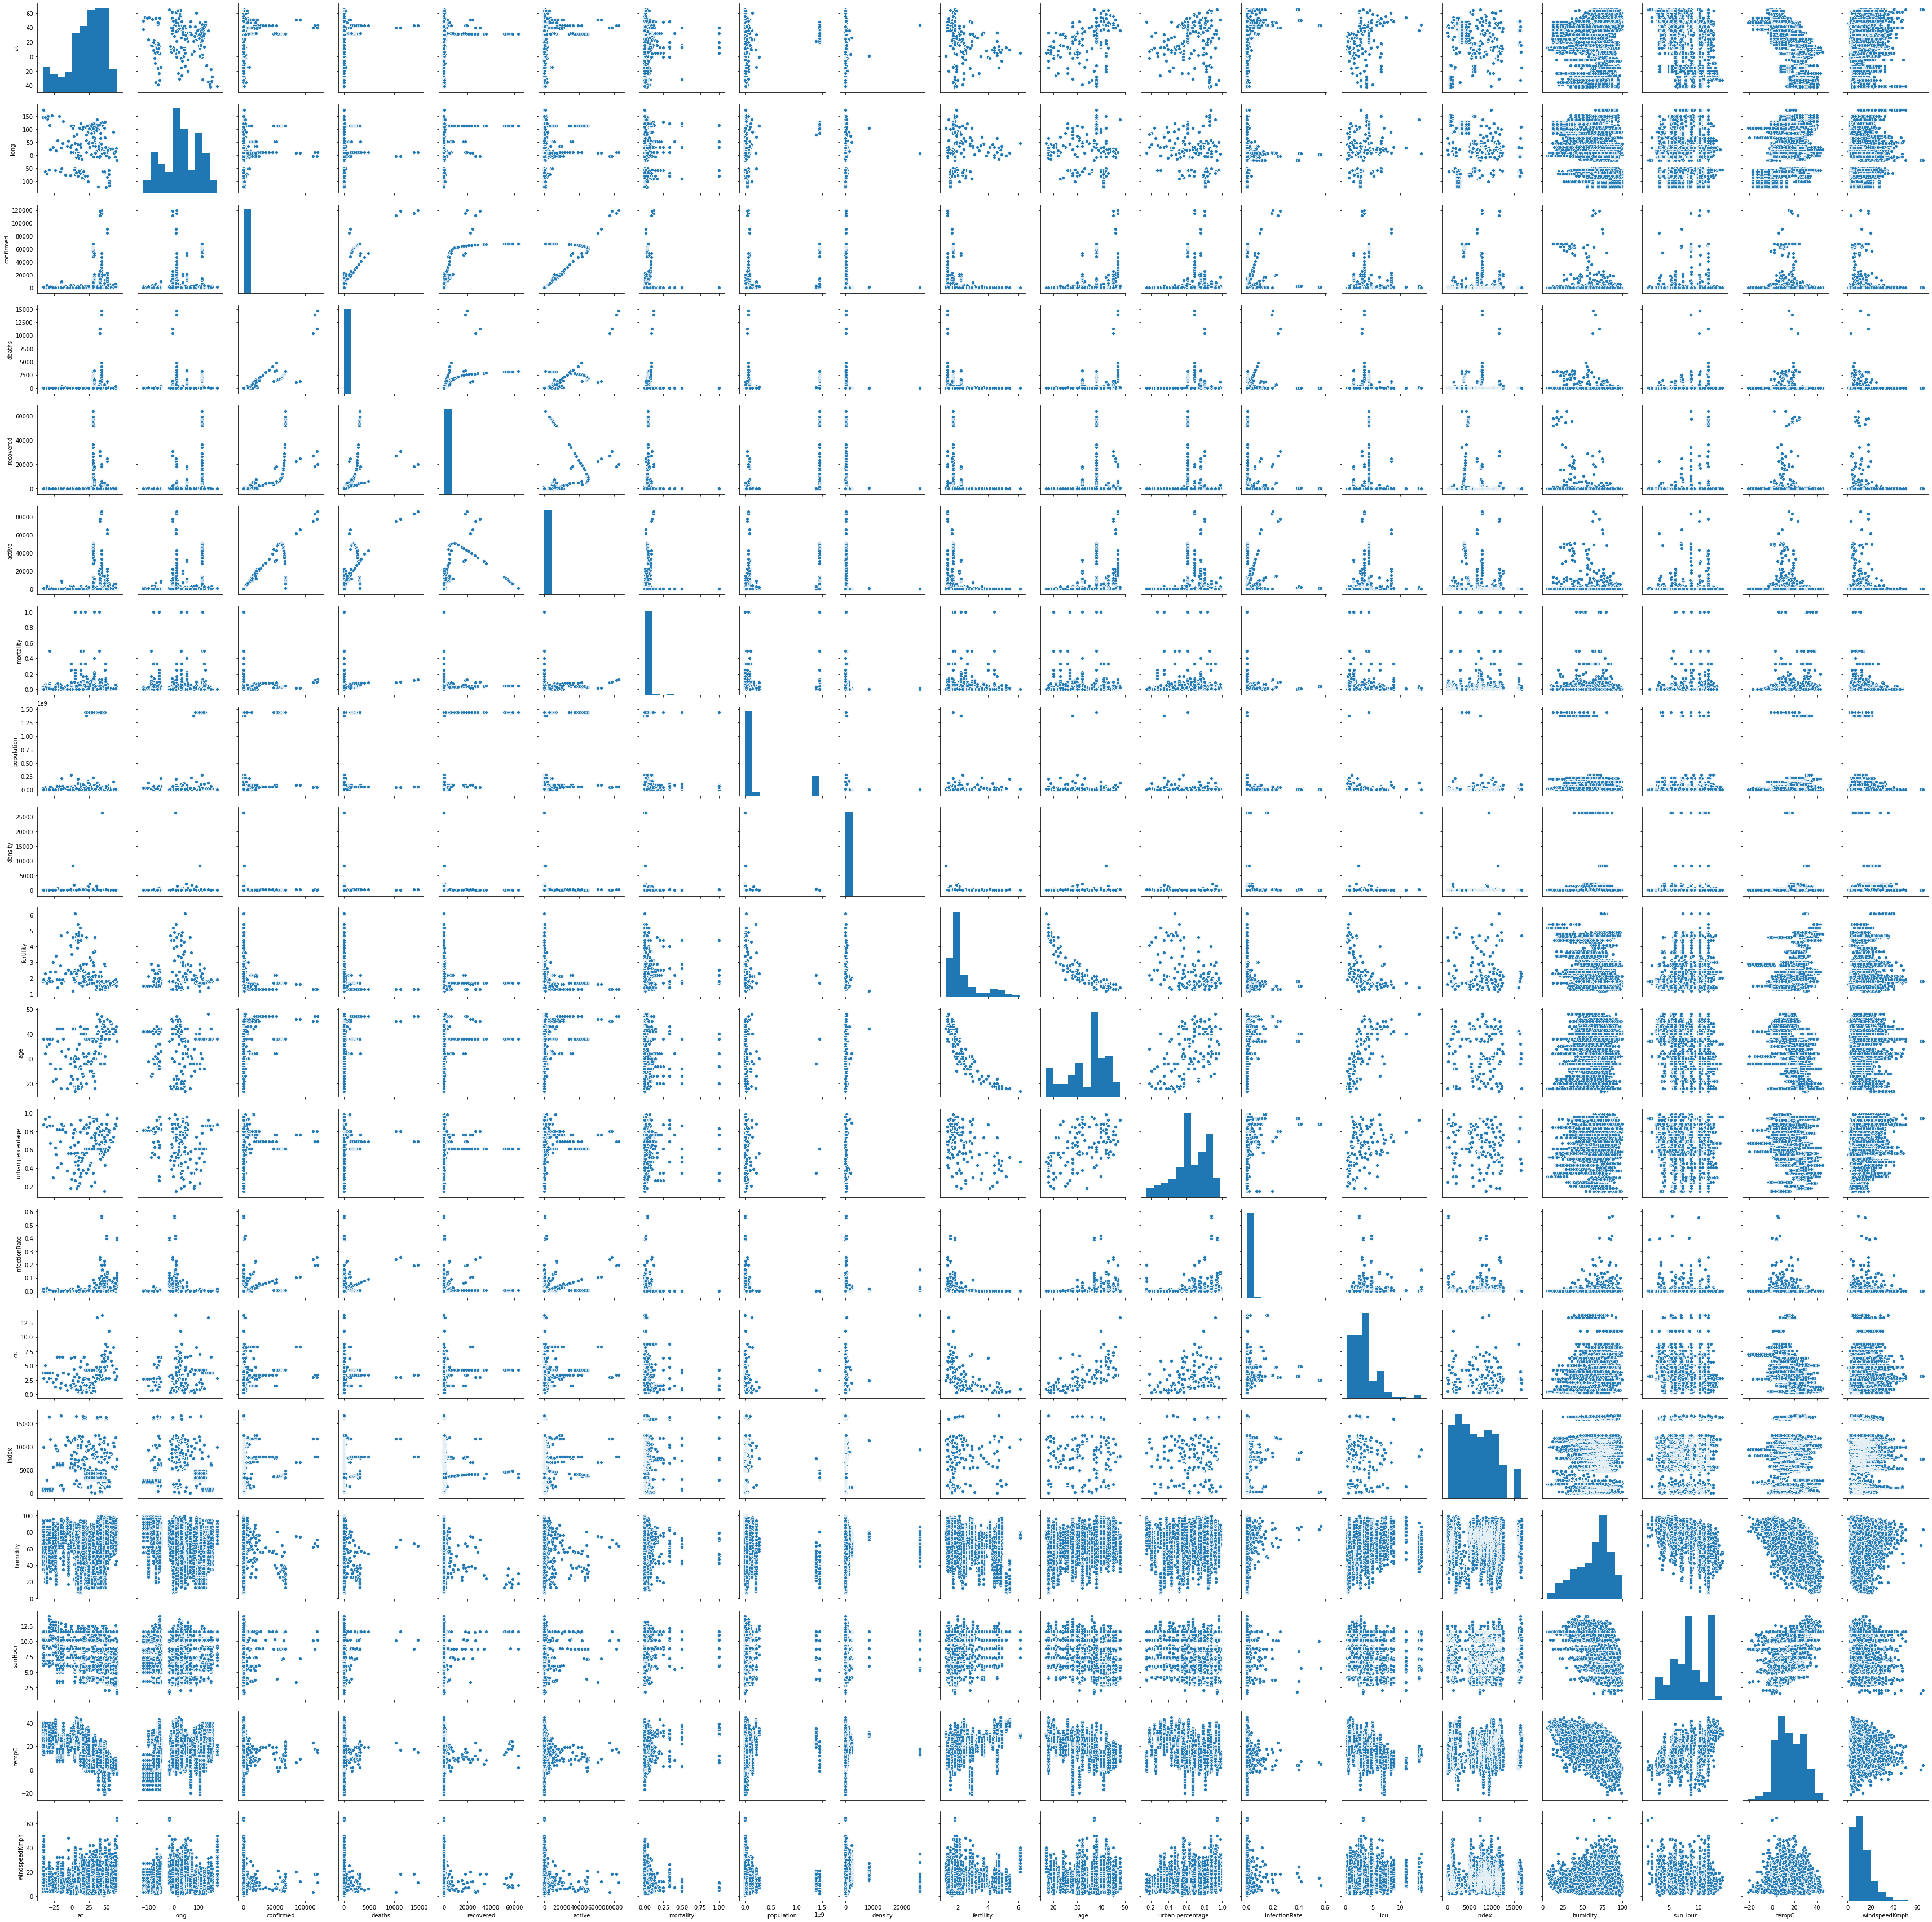

In [46]:
plt.figure(figsize=(20, 10))
sns.pairplot(data)

#### Dependent Variable Vs Confirmed Cases - Pair Plot

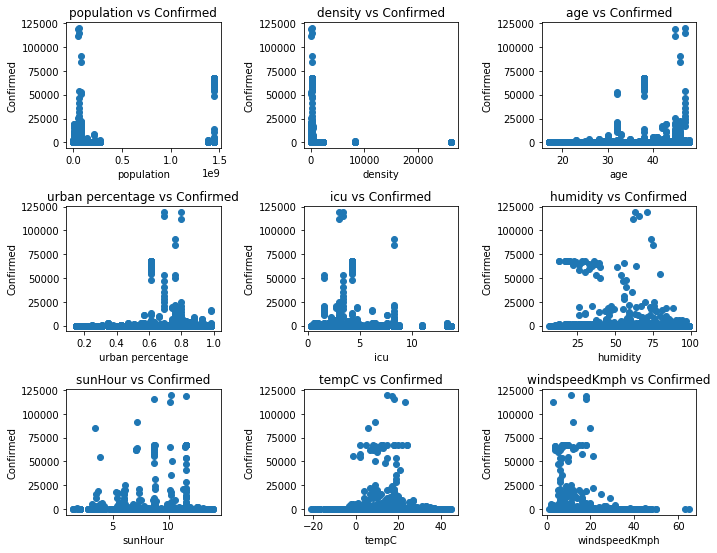

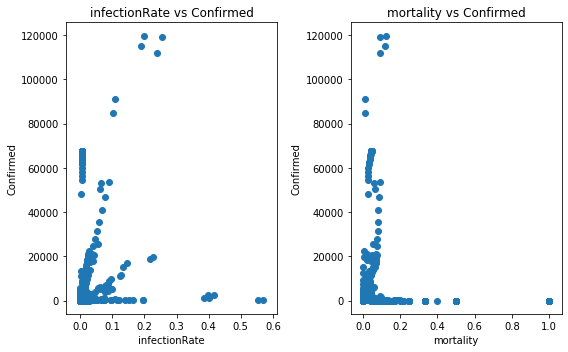

In [47]:
def scatter(x,fig):
    plt.subplot(6,3,fig)
    plt.scatter(data[x],data['confirmed'])
    plt.title(x+' vs Confirmed')
    plt.ylabel('Confirmed')
    plt.xlabel(x)

plt.figure(figsize=(10,15))

scatter('population', 1)
scatter('density', 2)
scatter('age', 3)
scatter('urban percentage', 4)
scatter('icu', 5)
scatter('humidity', 6)
scatter('sunHour', 7)
scatter('tempC', 8)
scatter('windspeedKmph', 9)

plt.tight_layout()

def scatter(x,fig):
    plt.subplot(1,2,fig)
    plt.scatter(data[x],data['confirmed'])
    plt.title(x+' vs Confirmed')
    plt.ylabel('Confirmed')
    plt.xlabel(x)

plt.figure(figsize=(8,5))

scatter('infectionRate', 1)
scatter('mortality', 2)
plt.tight_layout()

#### Dependent Variable Vs Fatalities - Pair Plot

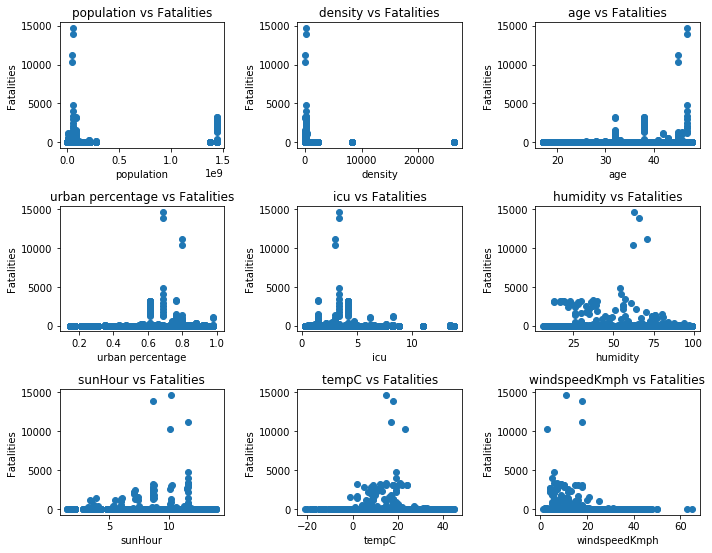

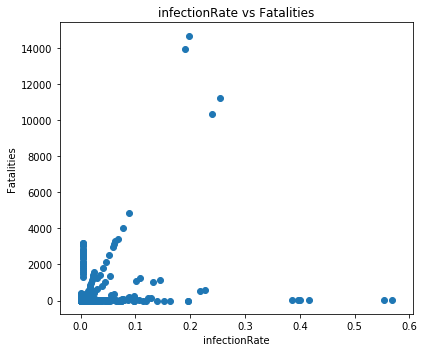

In [48]:
def scatter(x,fig):
    plt.subplot(6,3,fig)
    plt.scatter(data[x],data['deaths'])
    plt.title(x+' vs Fatalities')
    plt.ylabel('Fatalities')
    plt.xlabel(x)

plt.figure(figsize=(10,15))

scatter('population', 1)
scatter('density', 2)
scatter('age', 3)
scatter('urban percentage', 4)
scatter('icu', 5)
scatter('humidity', 6)
scatter('sunHour', 7)
scatter('tempC', 8)
scatter('windspeedKmph', 9)

plt.tight_layout()
def scatter(x,fig):
    plt.subplot(1,1,fig)
    plt.scatter(data[x],data['deaths'])
    plt.title(x+' vs Fatalities')
    plt.ylabel('Fatalities')
    plt.xlabel(x)

plt.figure(figsize=(6,5))

scatter('infectionRate', 1)

plt.tight_layout()

#### Dependent Variable Vs Infection Rate - Pair Plot

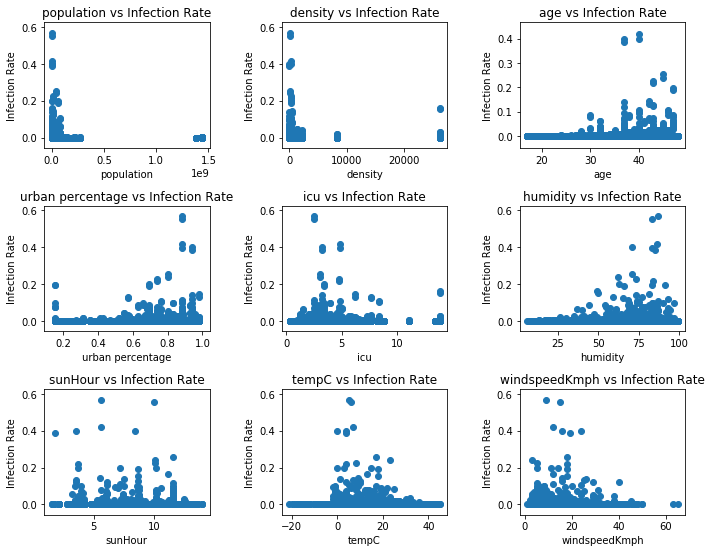

In [49]:
def scatter(x,fig):
    plt.subplot(6,3,fig)
    plt.scatter(data[x],data['infectionRate'])
    plt.title(x+' vs Infection Rate')
    plt.ylabel('Infection Rate')
    plt.xlabel(x)

plt.figure(figsize=(10,15))

scatter('population', 1)
scatter('density', 2)
scatter('age', 3)
scatter('urban percentage', 4)
scatter('icu', 5)
scatter('humidity', 6)
scatter('sunHour', 7)
scatter('tempC', 8)
scatter('windspeedKmph', 9)

plt.tight_layout()

#### Dependent Variable Vs Mortality - Pair Plot

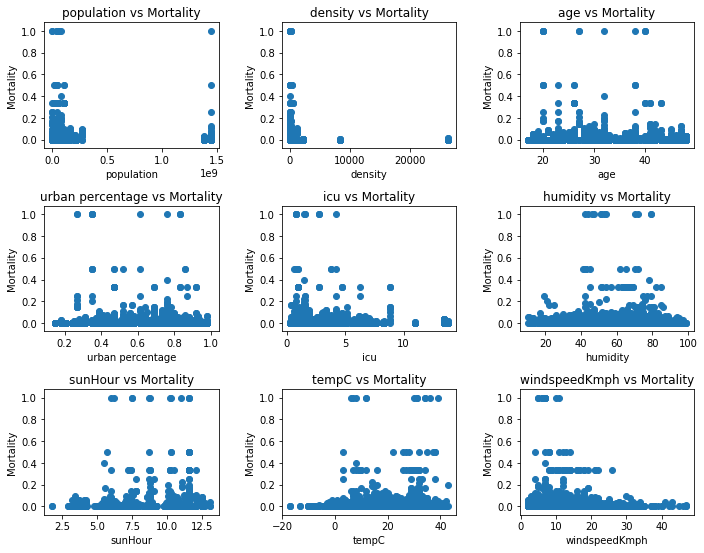

In [50]:
def scatter(x,fig):
    plt.subplot(6,3,fig)
    plt.scatter(data[x],data['mortality'])
    plt.title(x+' vs Mortality')
    plt.ylabel('Mortality')
    plt.xlabel(x)

plt.figure(figsize=(10,15))

scatter('population', 1)
scatter('density', 2)
scatter('age', 3)
scatter('urban percentage', 4)
scatter('icu', 5)
scatter('humidity', 6)
scatter('sunHour', 7)
scatter('tempC', 8)
scatter('windspeedKmph', 9)

plt.tight_layout()

#### Feature Dependability - Heat Map

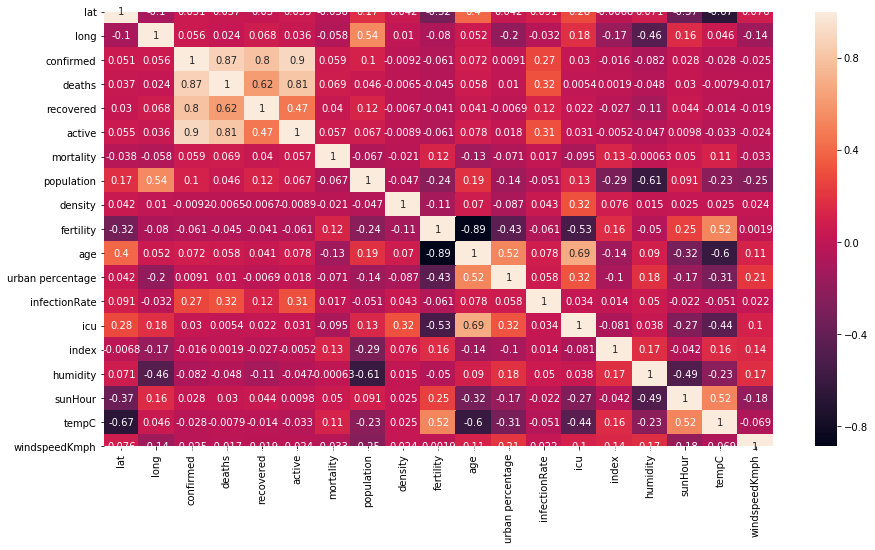

In [51]:
corr=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 0 to 7851
Data columns (total 22 columns):
state               7852 non-null object
country             7852 non-null object
lat                 7852 non-null float64
long                7852 non-null float64
date                7852 non-null datetime64[ns]
confirmed           7852 non-null int64
deaths              7852 non-null int64
recovered           7852 non-null int64
active              7852 non-null int64
mortality           3807 non-null float64
population          7852 non-null int64
density             7852 non-null int64
fertility           7726 non-null float64
age                 7726 non-null float64
urban percentage    7684 non-null float64
infectionRate       7852 non-null float64
icu                 7810 non-null float64
index               7852 non-null int64
humidity            7770 non-null float64
sunHour             7770 non-null float64
tempC               7770 non-null float64
windspeedKmph       

### Data creation for Training & Testing 

In [53]:
data_train_test = data

In [54]:
display(data_train_test.shape)
display(data_train_test.info())
display(data_train_test.head())
display(data_train_test.describe())

(7852, 22)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 0 to 7851
Data columns (total 22 columns):
state               7852 non-null object
country             7852 non-null object
lat                 7852 non-null float64
long                7852 non-null float64
date                7852 non-null datetime64[ns]
confirmed           7852 non-null int64
deaths              7852 non-null int64
recovered           7852 non-null int64
active              7852 non-null int64
mortality           3807 non-null float64
population          7852 non-null int64
density             7852 non-null int64
fertility           7726 non-null float64
age                 7726 non-null float64
urban percentage    7684 non-null float64
infectionRate       7852 non-null float64
icu                 7810 non-null float64
index               7852 non-null int64
humidity            7770 non-null float64
sunHour             7770 non-null float64
tempC               7770 non-null float64
windspeedKmph       

None

,state,country,lat,long,date,confirmed,deaths,recovered,active,mortality,...,fertility,age,urban percentage,infectionRate,icu,index,humidity,sunHour,tempC,windspeedKmph
0,,Afghanistan,33.0,65.0,2020-01-22,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,0,65.0,8.7,-1.0,8.0
1,,Afghanistan,33.0,65.0,2020-01-23,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,1,59.0,8.7,-3.0,8.0
2,,Afghanistan,33.0,65.0,2020-01-24,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,2,71.0,7.1,0.0,7.0
3,,Afghanistan,33.0,65.0,2020-01-25,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,3,79.0,8.7,0.0,7.0
4,,Afghanistan,33.0,65.0,2020-01-26,0,0,0,0,NaN,...,4.6,18.0,0.25,0.0,0.5,4,64.0,8.7,-1.0,8.0


,lat,long,confirmed,deaths,recovered,active,mortality,population,density,fertility,age,urban percentage,infectionRate,icu,index,humidity,sunHour,tempC,windspeedKmph
count,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,3807.000000,7.852000e+03,7852.000000,7726.000000,7726.000000,7684.000000,7852.000000,7810.000000,7852.000000,7770.000000,7770.000000,7770.000000,7770.000000
mean,22.877934,31.000446,562.982298,24.565716,188.555655,349.860927,0.016595,2.886241e+08,341.328324,2.214717,34.511520,0.656605,0.001762,3.466428,6567.584692,62.852767,8.627542,16.259846,12.200644
std,25.113476,70.650673,5274.349493,350.226300,2453.309743,3331.853933,0.070787,5.432920e+08,2015.158894,0.983484,7.901354,0.185540,0.016421,2.204365,4215.606177,21.011908,2.607200,11.486192,7.360215
min,-41.454500,-123.120700,0.000000,0.000000,0.000000,0.000000,0.000000,3.812800e+04,2.000000,1.200000,17.000000,0.150000,0.000000,0.300000,0.000000,6.000000,1.500000,-21.000000,1.000000
25%,8.538000,-7.092600,0.000000,0.000000,0.000000,0.000000,0.000000,5.792202e+06,26.000000,1.700000,29.000000,0.560000,0.000000,1.900000,2976.750000,48.000000,6.900000,7.000000,7.000000
50%,27.614000,28.283300,0.000000,0.000000,0.000000,0.000000,0.000000,2.654586e+07,108.000000,1.800000,38.000000,0.630000,0.000000,3.400000,6059.000000,68.000000,8.700000,15.000000,10.000000
75%,42.500000,101.487000,42.000000,0.000000,1.000000,18.000000,0.010988,8.433907e+07,153.000000,2.400000,41.000000,0.820000,0.000030,4.200000,9672.500000,79.000000,11.600000,26.000000,16.000000
max,64.963100,174.886000,119827.000000,14681.000000,63612.000000,85388.000000,1.000000,1.439324e+09,26337.000000,6.100000,48.000000,0.980000,0.568170,13.800000,16676.000000,99.000000,14.000000,45.000000,65.000000


***Note***

I wish to have a look at countries which already have an infection ratio higher than 0, because the ones that aren't infected yet, might bias the feature importance

In [55]:
threshold = 0
data_train_test = data_train_test[data_train_test['infectionRate'] > threshold]

In [56]:
data_train_test.shape

(3068, 22)

In [57]:
data_train_test.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'deaths',
       'recovered', 'active', 'mortality', 'population', 'density',
       'fertility', 'age', 'urban percentage', 'infectionRate', 'icu', 'index',
       'humidity', 'sunHour', 'tempC', 'windspeedKmph'],
      dtype='object')

In [58]:
data_train_test = data_train_test.drop(["mortality","country","active","recovered","infectionRate","state",
                                        "lat","long","date","index"], 
                             axis= 1).dropna()

In [59]:
display(data_train_test.shape)
display(data_train_test.info())
display(data_train_test.head())
display(data_train_test.describe())

(2939, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 31 to 7851
Data columns (total 12 columns):
confirmed           2939 non-null int64
deaths              2939 non-null int64
population          2939 non-null int64
density             2939 non-null int64
fertility           2939 non-null float64
age                 2939 non-null float64
urban percentage    2939 non-null float64
icu                 2939 non-null float64
humidity            2939 non-null float64
sunHour             2939 non-null float64
tempC               2939 non-null float64
windspeedKmph       2939 non-null float64
dtypes: float64(8), int64(4)
memory usage: 298.5 KB


None

,confirmed,deaths,population,density,fertility,age,urban percentage,icu,humidity,sunHour,tempC,windspeedKmph
31,7,0,38928346,60,4.6,18.0,0.25,0.5,52.0,11.6,13.0,4.0
32,11,0,38928346,60,4.6,18.0,0.25,0.5,31.0,11.6,14.0,5.0
33,16,0,38928346,60,4.6,18.0,0.25,0.5,30.0,11.6,14.0,4.0
34,21,0,38928346,60,4.6,18.0,0.25,0.5,32.0,10.2,14.0,4.0
35,22,0,38928346,60,4.6,18.0,0.25,0.5,44.0,11.6,15.0,3.0


,confirmed,deaths,population,density,fertility,age,urban percentage,icu,humidity,sunHour,tempC,windspeedKmph
count,2939.000000,2939.000000,2.939000e+03,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,1496.200408,65.534536,5.105712e+08,154.244981,2.015550,36.028581,0.666046,3.739946,56.049677,9.161415,15.872746,11.917319
std,8540.651788,570.161957,6.665199e+08,245.729566,0.787228,6.787537,0.164277,2.031512,22.061218,2.429098,10.467565,6.903667
min,1.000000,0.000000,9.834700e+04,2.000000,1.300000,17.000000,0.180000,0.300000,10.000000,1.800000,-17.000000,2.000000
25%,11.000000,0.000000,1.019671e+07,46.000000,1.700000,32.000000,0.610000,2.600000,37.000000,7.400000,8.000000,7.000000
50%,94.000000,1.000000,3.892835e+07,137.000000,1.700000,38.000000,0.610000,4.200000,59.000000,8.800000,14.000000,10.000000
75%,350.500000,3.000000,1.439324e+09,153.000000,2.000000,40.000000,0.810000,4.200000,75.000000,11.600000,24.000000,16.000000
max,119827.000000,14681.000000,1.439324e+09,2239.000000,6.100000,48.000000,0.980000,13.400000,99.000000,13.100000,43.000000,47.000000


#### Creating Attributes & Labels

Next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features(Dependent Variables) and y variable contains labels(Target Variables).

In [60]:
X = data_train_test.drop(["confirmed", "deaths"],axis=1)
y = data_train_test[["confirmed", "deaths"]]

In [61]:
print(X.shape,y.shape)
display(X.head())

(2939, 10) (2939, 2)


,population,density,fertility,age,urban percentage,icu,humidity,sunHour,tempC,windspeedKmph
31,38928346,60,4.6,18.0,0.25,0.5,52.0,11.6,13.0,4.0
32,38928346,60,4.6,18.0,0.25,0.5,31.0,11.6,14.0,5.0
33,38928346,60,4.6,18.0,0.25,0.5,30.0,11.6,14.0,4.0
34,38928346,60,4.6,18.0,0.25,0.5,32.0,10.2,14.0,4.0
35,38928346,60,4.6,18.0,0.25,0.5,44.0,11.6,15.0,3.0


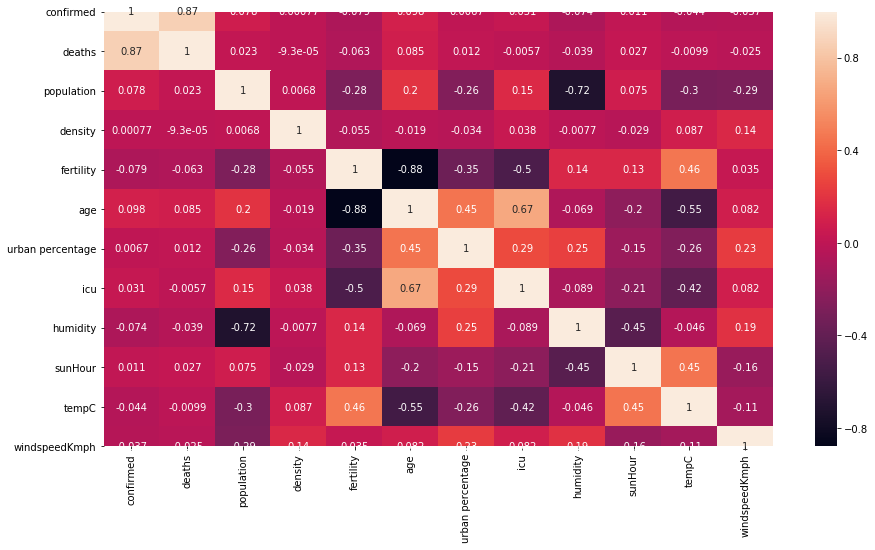

In [62]:
corr=data_train_test.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

#### Understanding the most relevant Features

[0.09342687 0.03990494 0.03590935 0.04190814 0.04454623 0.04765088
 0.20686124 0.1344571  0.17354915 0.18178609]


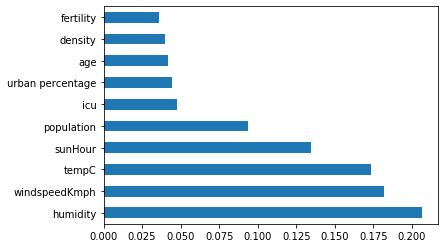

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Importing the SK Learn Libraries

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

In [65]:
X.head(2)

,population,density,fertility,age,urban percentage,icu,humidity,sunHour,tempC,windspeedKmph
31,38928346,60,4.6,18.0,0.25,0.5,52.0,11.6,13.0,4.0
32,38928346,60,4.6,18.0,0.25,0.5,31.0,11.6,14.0,5.0


In [66]:
y.head(2)

,confirmed,deaths
31,7,0
32,11,0


In [67]:
data_train_test.head(2)

,confirmed,deaths,population,density,fertility,age,urban percentage,icu,humidity,sunHour,tempC,windspeedKmph
31,7,0,38928346,60,4.6,18.0,0.25,0.5,52.0,11.6,13.0,4.0
32,11,0,38928346,60,4.6,18.0,0.25,0.5,31.0,11.6,14.0,5.0


### Train and Evaluate Model (Linear Regression )

In [68]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y['confirmed'], 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42,shuffle=True)

In [69]:
model_infected=LinearRegression(normalize=True)
model_infected.fit(X_train, y_train)

y_pred_test=model_infected.predict(X_test)
y_pred_train=model_infected.predict(X_train)

In [70]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.02235858687392811
R-sqaure on test data: 0.015333210036075129
RMSE on train data: 8639.206547704798
RMSE on test data: 7995.305372457103


Text(0.5, 0, 'Index')

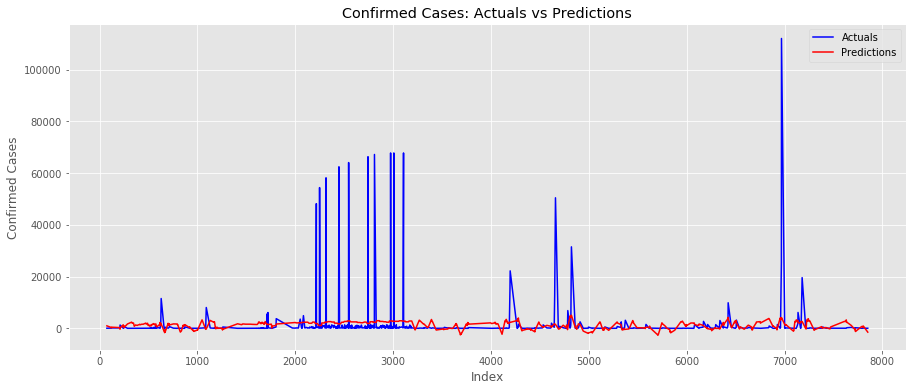

In [71]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Confirmed Cases: Actuals vs Predictions')
ax.set_ylabel('Confirmed Cases')
ax.set_xlabel('Index')

***Inference***

The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in not at all Linear.


### Train and Evaluate Model (Random Forest)


#### Calculating The RMSLE and cross Validation Score

In [72]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error of a prediction set.
    params:
        y_true: numpy array of ground truth
        y_pred: numpy array of predictions
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle)

In [73]:
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X, y, test_size= 0.2, random_state=42, shuffle=True)

##### Calculating The RMSLE and cross Validation Score for Infections(confirmed Cases)

In [74]:
from sklearn.tree import DecisionTreeRegressor

model_infected_dt = DecisionTreeRegressor(random_state=42, criterion="mse")

scores = cross_val_score(model_infected_dt, 
                      X_train_rf,
                      y_train_rf['confirmed'],
                      cv=5, scoring=rmsle_scorer)

print("Cross Validation of Confirmed Cases: Mean = {}, std = {}".format(scores.mean(), scores.std()))
model_infected_dt.fit(X_train_rf, y_train_rf['confirmed'])
result_infected_dt = rmsle(y_val_rf['confirmed'], model_infected_dt.predict(X_val_rf))
print("Validation Infected set RMSLE: {}".format(result_infected_dt))



Cross Validation of Confirmed Cases: Mean = 2.3390961222894573, std = 0.03459188422575937
Validation Infected set RMSLE: 2.3472734168171328


##### Calculating The RMSLE and cross Validation Score for Fatalities(Deaths)

In [75]:
model_deaths_dt = DecisionTreeRegressor(random_state=42, criterion="mae")

scores = cross_val_score(model_deaths_dt, 
                      X_train_rf,
                      y_train_rf["deaths"],
                      cv=5, scoring=rmsle_scorer)

print("Cross Validation of Fatal Cases: Mean = {}, std = {}".format(scores.mean(), scores.std()))
model_deaths_dt.fit(X_train_rf, y_train_rf["deaths"])
result_deaths_dt = rmsle(y_val_rf["deaths"], model_deaths_dt.predict(X_val_rf))
print("Validation of Death set RMSLE: {}".format(result_deaths_dt))

Cross Validation of Fatal Cases: Mean = 1.530373022718409, std = 0.08489326887742725
Validation of Death set RMSLE: 1.3452496073452587


##### Calculating The Combined or Final RMSLE

In [76]:
# Final Evalutation
print("Final Validation of RMSLE score: {}".format(np.mean([result_infected_dt, result_deaths_dt])))

Final Validation of RMSLE score: 1.8462615120811958


### Extract Features for Predicting Confirmed Cases

[0.09342687 0.03990494 0.03590935 0.04190814 0.04454623 0.04765088
 0.20686124 0.1344571  0.17354915 0.18178609]


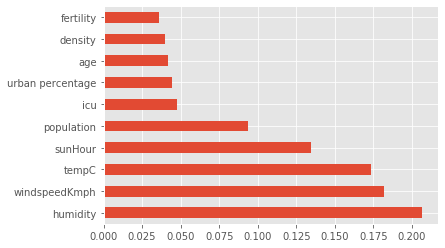

In [77]:
model_infected_dt = DecisionTreeRegressor(random_state=42, criterion="mae")
model_infected_dt.fit(X,y['confirmed'])
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

#### Lets first decide optimal number of features rather than arbitarily specifying count of features to be used in model in the RFE function


In [78]:
from sklearn.feature_selection import RFE
model_infected_dt.fit(X_train_rf,y_train_rf['confirmed'])
rfe = RFE(model_infected_dt, 10)
rfe = rfe.fit(X_train_rf, y_train_rf['confirmed'])

In [79]:
list(zip(X_train_rf.columns,rfe.support_,rfe.ranking_))

[('population', True, 1),
 ('density', True, 1),
 ('fertility', True, 1),
 ('age', True, 1),
 ('urban percentage', True, 1),
 ('icu', True, 1),
 ('humidity', True, 1),
 ('sunHour', True, 1),
 ('tempC', True, 1),
 ('windspeedKmph', True, 1)]

#### Prediction

In [80]:
y_pred_test_dt = model_infected_dt.predict(X_val_rf)
y_pred_train_dt = model_infected_dt.predict(X_train_rf)

#### R-Square & RMSE Calculation

In [81]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train_rf['confirmed'], y_pred=y_pred_train_dt)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_val_rf['confirmed'], y_pred=y_pred_test_dt)))


#Standard error/RMSE
error_train=y_pred_train_dt-y_train_rf['confirmed']
error_test=y_pred_test_dt-y_val_rf['confirmed']

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.44923591235785343
R-sqaure on test data: -0.04487558270447867
RMSE on train data: 6729.457625170575
RMSE on test data: 6089.917125865915


In [82]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(1,10)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(1,10):

    # RFE with n features
    model_infected_dt = DecisionTreeRegressor(random_state=42, criterion="mae")
    
    # specifying number of features
    rfe_n = RFE(estimator=model_infected_dt, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train_rf, y_train_rf['confirmed'])

    # selecting features selected by rfe_n
    col_n = X_train_rf.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train_rf[col_n]
    X_test_rfe_n = X_val_rf[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    dt_n = sm.OLS(y_train_rf['confirmed'], X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test_dt = dt_n.predict(X_test_rfe_n)
    y_pred_train_dt = dt_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(dt_n.rsquared_adj)
    train_r2.append(dt_n.rsquared)
    test_r2.append(r2_score(y_val_rf['confirmed'], y_pred_test_dt))
    
    #RMSE/stan. error
    error_test=y_pred_test_dt-y_val_rf['confirmed']
    error_train=y_pred_train_dt-y_train_rf['confirmed']
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

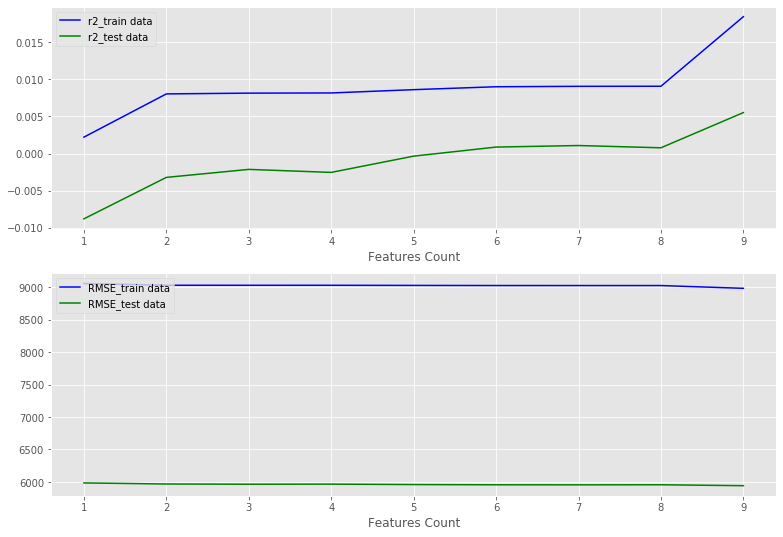

In [83]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(1, 10, step=1))#method 2 of ticks

plt.show()

#### Accuracy

In [84]:
model_infected_dt = DecisionTreeRegressor(random_state=42, criterion="mse")
model_infected_dt.fit(X_train_rf,y_train_rf['confirmed'])
y_pred_test_dt = model_infected_dt.predict(X_val_rf)
print('Accuracy of Decision Tree regression classifier on test set: {:.2f}'.format(model_infected_dt.score(X_val_rf, 
                                                                                                      y_val_rf['confirmed'])))

Accuracy of Decision Tree regression classifier on test set: -0.68


In [85]:
y_val_rf

,confirmed,deaths
5449,18,0
1995,75,0
6587,8,0
528,29,0
2883,75,0
...,...,...
2337,290,0
2956,136,3
2459,132,0
6840,286,1


In [86]:
y_pred_test

array([ 3.01151781e+03,  2.22921331e+03, -3.31791449e+02,  1.00301774e+03,
        2.66145536e+03,  2.14918606e+03,  2.12724945e+03,  4.28845243e+02,
        1.21421358e+03, -9.17956019e+02,  1.59572360e+03,  1.86911889e+02,
       -1.61464924e+03,  1.54883453e+02, -6.11981568e+02,  3.64092577e+03,
        1.20661847e+03,  2.66214723e+03,  1.09615904e+03, -8.95595236e+02,
        2.47502257e+03,  3.00983624e+03,  2.54950315e+03, -7.95127004e+01,
       -8.68010919e+02,  1.09615904e+03, -3.84560846e+02,  1.36921790e+03,
       -4.09203815e+02,  3.99992049e+03,  2.34817956e+03,  2.34691870e+03,
        1.24540271e+03,  2.05254777e+01,  2.77724779e+03,  4.96256583e+03,
        1.32016363e+03,  2.12250939e+03,  1.16885375e+03,  2.49390259e+03,
        8.40441782e+02, -1.41107111e+02,  2.69689713e+03,  1.53556475e+03,
        4.67066498e+02,  2.43478963e+03,  1.98821488e+03,  2.82307343e+03,
        3.06019427e+03,  1.53792012e+03,  2.36341448e+03, -1.71285636e+03,
        2.85960357e+03,  

In [87]:
y_pred_train

array([3306.97534097, -253.08001634, 2580.35958201, ..., 2259.73144903,
       2948.77353483, 2592.47518823])

***Inference***

The Decision Tree regressor also is not suitable, with low accuracy and high RMSLE values

In [88]:
X

,population,density,fertility,age,urban percentage,icu,humidity,sunHour,tempC,windspeedKmph
31,38928346,60,4.6,18.0,0.25,0.5,52.0,11.6,13.0,4.0
32,38928346,60,4.6,18.0,0.25,0.5,31.0,11.6,14.0,5.0
33,38928346,60,4.6,18.0,0.25,0.5,30.0,11.6,14.0,4.0
34,38928346,60,4.6,18.0,0.25,0.5,32.0,10.2,14.0,4.0
35,38928346,60,4.6,18.0,0.25,0.5,44.0,11.6,15.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7847,18383955,25,4.7,18.0,0.45,2.0,86.0,8.8,25.0,10.0
7848,18383955,25,4.7,18.0,0.45,2.0,81.0,11.6,25.0,11.0
7849,18383955,25,4.7,18.0,0.45,2.0,85.0,7.4,21.0,9.0
7850,18383955,25,4.7,18.0,0.45,2.0,88.0,8.0,25.0,10.0


In [89]:
y

,confirmed,deaths
31,7,0
32,11,0
33,16,0
34,21,0
35,22,0
...,...,...
7847,2,0
7848,2,0
7849,2,0
7850,39,1


In [90]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=1)
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
svm.fit(X_train,y_train['confirmed'])

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
pd.isnull(X).sum() > 0

population          False
density             False
fertility           False
age                 False
urban percentage    False
icu                 False
humidity            False
sunHour             False
tempC               False
windspeedKmph       False
dtype: bool

In [97]:
y_pred_test = svm.predict(X_test)
y_pred_train =svm.predict(X_train)

In [101]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(data.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lm.predict(np.array(X_test)))
    new_prediction_svm.append(svm.predict(np.array(X_test)))

TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'